# 📊 Predicción de Abandono de Clientes (Churn)
Este proyecto entrena una red neuronal simple para predecir si un cliente abandonará un servicio.

### Objetivos:
- Cargar y preparar un dataset tabular
- Entrenar una red neuronal con Keras
- Visualizar curvas de entrenamiento
- Evaluar el modelo con métricas comunes
- Aplicar buenas prácticas de ingeniería de proyectos

In [1]:
# 📦 1. Importar librerías principales
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import numpy as np

In [2]:
# 📁 2. Cargar y explorar el dataset
df = pd.read_csv('../data/churn_dataset.csv')
df.head(10)

,compras,llamadas_soporte,dias_inactivo,tiempo_suscrito,churn
0,4,0,27,1,1
1,1,2,25,13,1
2,3,1,18,6,1
3,3,2,23,17,1
4,2,3,18,12,1
5,3,2,16,23,1
6,2,3,12,19,0
7,3,3,12,6,0
8,0,3,25,7,1
9,2,2,27,1,1


In [3]:
# 🔍 3. Separar variables predictoras y variable objetivo
X = df.drop("churn", axis=1)
y = df["churn"]

In [4]:
# 🧼 4. Escalar los datos y dividir en train/test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# 🧠 5. Cargar configuración y modelo
import sys, os, yaml
sys.path.append(os.path.abspath("../src"))

from model import build_model
from utils import plot_metrics, show_confusion_matrix

with open("../src/config.yaml") as f:
    config = yaml.safe_load(f)

model = build_model(config)

In [6]:
# balanceo de clases por class_weight

weights = class_weight.compute_class_weight(class_weight='balanced',
                                            classes=np.unique(y_train),
                                            y=y_train)

class_weights = dict(zip(np.unique(y_train), weights))

In [7]:
# 🚂 6. Entrenar el modelo
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=config['training']['epochs'],
                    batch_size=config['training']['batch_size'],
                    class_weight=class_weights)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4780 - loss: 0.7144 - val_accuracy: 0.7750 - val_loss: 0.5110
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.4402 - val_accuracy: 0.7812 - val_loss: 0.4158
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8308 - loss: 0.3339 - val_accuracy: 0.8188 - val_loss: 0.3768
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.3494 - val_accuracy: 0.8438 - val_loss: 0.3618
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8275 - loss: 0.3579 - val_accuracy: 0.8188 - val_loss: 0.3584
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8545 - loss: 0.3104 - val_accuracy: 0.8188 - val_loss: 0.3564
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8529 - loss: 0.3075 - val_accuracy: 0.8500 - val_loss: 0.3557
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 0.3170 - val_accuracy: 0.8250 - v

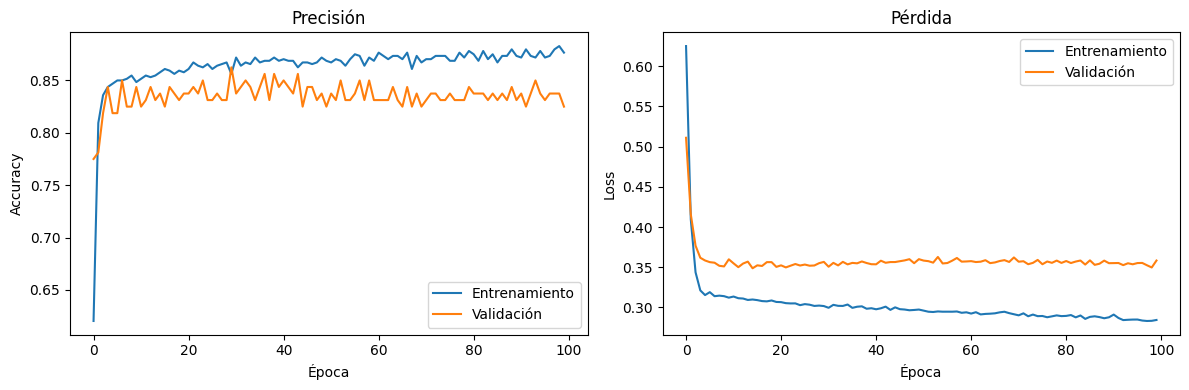

In [8]:
# 📉 7. Visualizar métricas de entrenamiento
plot_metrics(history)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


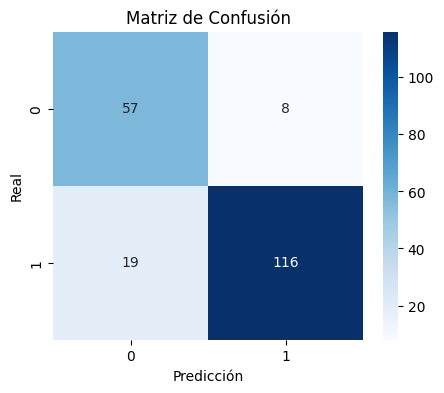

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        65
           1       0.94      0.86      0.90       135

    accuracy                           0.86       200
   macro avg       0.84      0.87      0.85       200
weighted avg       0.88      0.86      0.87       200



In [9]:
# 🧪 8. Evaluar el modelo en test
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

show_confusion_matrix(y_test, y_pred_classes)